In [11]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
import warnings
import xarray as xr
import matplotlib as mpl

#modules for datacube
import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff

from datacube.storage.masking import mask_invalid_data

# set datacube alias (just a string with what you're doing)
dc = datacube.Datacube(app='dc-WOfS and water classifier sent')

# Import external functions from dea-notebooks
sys.path.append('/g/data/r78/DPIPWE_lm/dea-notebooks/10_Scripts/')
import DEADataHandling, water_classifier_and_wofs, DEAPlotting

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

#set output directory
savefilepath = os.path.expanduser('/g/data/r78/DPIPWE_lm/output_data/')

In [2]:
bands = ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir_1', 'nbart_swir_2']

In [21]:
'''
query_sROW = {
                'time': ('2016-03-14'),
                'x': (1211000, 1205000),
                'y': (-4628000, -4641000),
                'measurements': bands,
                'crs': 'EPSG:3577',
                'output_crs': 'EPSG:3577',
                'group_by': 'solar_day',
                'resolution': (-10,10)
                } 


query_sKW = {
                'time': ('2016-02-13'),
                'x': (1210000, 1195000),
                'y': (-4695000, -4672000),
                'measurements': bands,
                'crs': 'EPSG:3577',
                'output_crs': 'EPSG:3577',
                'group_by': 'solar_day',
                'resolution': (-10,10)
                } 

query_sMI = {
                'time': ('2016-03-14'),
                'x': (1174000, 1158000),
                'y': (-4632000, -4610000),
                'measurements': bands,
                'crs': 'EPSG:3577',
                'output_crs': 'EPSG:3577',
                'group_by': 'solar_day',
                'resolution': (-10,10)
                } 

'''
query_MI = {
                'time': ('2016-02-21'),
                'x': (1174000, 1158000),
                'y': (-4632000, -4610000),
                'crs': 'EPSG:3577'
                }

'''
query_KW = {
                'time': ('2016-03-16'),
                'x': (1210000, 1195000),
                'y': (-4695000, -4672000),
                'crs': 'EPSG:3577'
                }

query_BUR = {
                'time': ('2016-03-16'),
                'x': (1149000, 1165000),
                'y': (-4680000, -4650000),
                'crs': 'EPSG:3577'
                }
'''

"\nquery_KW = {\n                'time': ('2016-03-16'),\n                'x': (1210000, 1195000),\n                'y': (-4695000, -4672000),\n                'crs': 'EPSG:3577'\n                }\n\nquery_BUR = {\n                'time': ('2016-03-16'),\n                'x': (1149000, 1165000),\n                'y': (-4680000, -4650000),\n                'crs': 'EPSG:3577'\n                }\n"

In [22]:
#dc_data = dc.load(product='s2a_ard_granule', **query_sROW)
#dc_data = dc.load(product='ls8_nbart_albers', **query_BUR)
dc_data = dc.load(product='ls8_fc_albers', **query_MI)

# Do not use mask for fc data
#dc_data = mask_invalid_data(dc_data)

In [23]:
dc_data

<xarray.Dataset>
Dimensions:  (time: 1, x: 640, y: 880)
Coordinates:
  * time     (time) datetime64[ns] 2016-02-21T00:04:32
  * y        (y) float64 -4.61e+06 -4.61e+06 -4.61e+06 ... -4.632e+06 -4.632e+06
  * x        (x) float64 1.158e+06 1.158e+06 1.158e+06 ... 1.174e+06 1.174e+06
Data variables:
    BS       (time, y, x) int8 0 4 5 4 5 3 0 0 0 ... -1 -1 -1 -1 -1 -1 -1 -1 -1
    PV       (time, y, x) int8 86 88 86 85 85 83 71 68 ... -1 -1 -1 -1 -1 -1 -1
    NPV      (time, y, x) int8 13 8 9 10 9 13 28 31 ... -1 -1 -1 -1 -1 -1 -1 -1
    UE       (time, y, x) int8 34 39 40 41 42 40 34 33 ... -1 -1 -1 -1 -1 -1 -1
Attributes:
    crs:      EPSG:3577

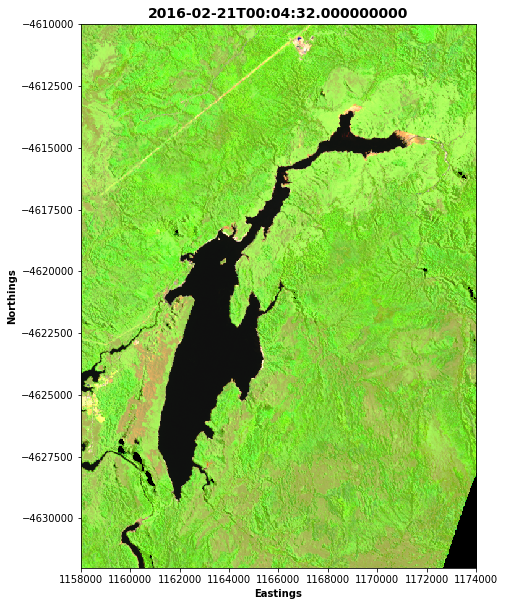

In [102]:
DEAPlotting.three_band_image(dc_data, bands = ['swir1', 'nir', 'green'], contrast_enhance=True);
#DEAPlotting.three_band_image(dc_data, bands = ['nbart_swir_2', 'nbart_red', 'nbart_green'], contrast_enhance=True);

In [103]:
#used to calculate mndwi (McFeeters NDWI)(not needed for landsat due to wofs)
ds_ndwi = (dc_data.green - dc_data.nir) / (dc_data.green + dc_data.nir)
ds_ndwi

dc_data["NDWI"] = ds_ndwi
dc_data

<xarray.Dataset>
Dimensions:          (time: 1, x: 640, y: 880)
Coordinates:
  * time             (time) datetime64[ns] 2016-02-21T00:04:32
  * y                (y) float64 -4.61e+06 -4.61e+06 ... -4.632e+06 -4.632e+06
  * x                (x) float64 1.158e+06 1.158e+06 ... 1.174e+06 1.174e+06
Data variables:
    coastal_aerosol  (time, y, x) float64 84.0 70.0 68.0 62.0 ... nan nan nan
    blue             (time, y, x) float64 62.0 33.0 30.0 22.0 ... nan nan nan
    green            (time, y, x) float64 185.0 145.0 133.0 ... nan nan nan
    red              (time, y, x) float64 155.0 88.0 82.0 80.0 ... nan nan nan
    nir              (time, y, x) float64 2.356e+03 2.059e+03 ... nan nan
    swir1            (time, y, x) float64 706.0 643.0 646.0 ... nan nan nan
    swir2            (time, y, x) float64 262.0 237.0 243.0 ... nan nan nan
    NDWI             (time, y, x) float64 -0.8544 -0.8684 -0.8646 ... nan nan
Attributes:
    crs:      EPSG:3577

In [51]:
#datacube.storage.storage.write_dataset_to_netcdf(dc_data, 'KW_s2a_nbart_20160213.nc')

In [52]:
#DEADataHandling.dataset_to_geotiff('BUR_ls8_nbart_20160316.tif', dc_data.isel(time=0))
#datacube.helpers.write_geotiff(dc_data, 'ROW_s2a_nbart_20160314.tif')

In [104]:
#Use water clasifier function
warnings.filterwarnings('ignore') #turn off warnings
water_class = water_classifier_and_wofs.water_classifier(dc_data)
warnings.filterwarnings('always') #turn on warnings
print(water_class)


<xarray.Dataset>
Dimensions:  (time: 1, x: 640, y: 880)
Coordinates:
  * time     (time) datetime64[ns] 2016-02-21T00:04:32
  * y        (y) float64 -4.61e+06 -4.61e+06 -4.61e+06 ... -4.632e+06 -4.632e+06
  * x        (x) float64 1.158e+06 1.158e+06 1.158e+06 ... 1.174e+06 1.174e+06
Data variables:
    wofs     (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


In [105]:
#note, this is using only one band for the count, and this isn't robust.
total_water_obs = water_class.wofs.sum(dim='time')
nbar_count = dc_data.blue.count(dim='time')
wofs = ((total_water_obs / nbar_count)*100)

dc_data["WOFS"] = wofs
dc_data

wofs

<xarray.DataArray (y: 880, x: 640)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 -4.61e+06 -4.61e+06 -4.61e+06 ... -4.632e+06 -4.632e+06
  * x        (x) float64 1.158e+06 1.158e+06 1.158e+06 ... 1.174e+06 1.174e+06

In [ ]:
# Compute NDWI using the formula (green - nir) / (green + nir). This will calculate
# NDWI for every time-step in the dataset:
#ds_ndwi = (dc_burbury.green - dc_burbury.nir) / (dc_burbury.green + dc_burbury.nir)
#ds_ndwi

In [24]:
#DEADataHandling.dataset_to_geotiff(savefilepath + 'BUR_ls8_fc_20160316.tif', dc_data.isel(time=0))

# Save fc images to netcdf as the function above doen't like int8
DEADataHandling.write_your_netcdf(dc_data.isel(time=0), 'fractional_cover', savefilepath + 'MI_ls8_fc_20160221.nc', crs = dc_data.crs)